Esteban Gonzalez Amigo

A continuación se presenta un problema clásico en el análisis de texto: Extraer el sentimiento
asociado a un texto.
Para esto, utilizaremos una base de datos provenientes de CrowdFlower.
Para descargar los datos puede ejecutar el siguiente código:

In [1]:

#!wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv -p drive/[text_emotion.csv]


El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un
tweet es positivo o negativo.
- Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.
  - Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivos auxiliares y csv).
  - Una vez terminada la prueba, comprime la carpeta y sube el .zip a la sección correspondiente.
  
**Objetivos**

Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
1. Generar un análisis exploratorio sobre los datos contenidos en el DataFrame, considerando
palabras más comunes y distribución de las clases en el vector objetivo.



In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# añadimos seaborn
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

import funciones_auxiliares as func

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df=pd.read_csv('text_emotion.csv').drop(columns='tweet_id')
df.head()

,sentiment,author,content
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


El dataset se compone por 4 columnas originalmente. El número de identificación del Tweet, el tipo de sentimiento que expresa el Tweet, autor y el mensaje.

De la base de datos original eliminamos la información correspondiente al ID porque no implica ninguna diferencia para la investigación que se desea realizar

In [5]:
df.shape

(40000, 3)

El dataset se compone por una base de datos de 3 columnas y 40000 filas

In [6]:
df.dtypes

sentiment    object
author       object
content      object
dtype: object

Las tres columnas del dataset son columnas objeto, es decir que se componen principalmente por mensajes (tipo de datos strings)

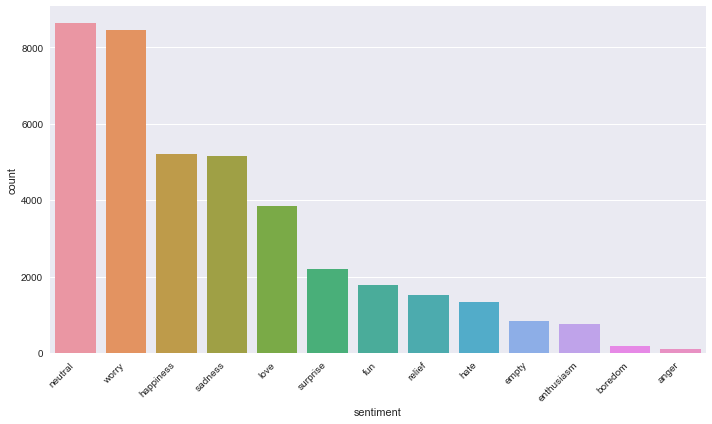

In [7]:
ax1 = sns.countplot(x='sentiment',data=df,order=df['sentiment'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45,ha='right')
plt.tight_layout()
plt.show()

En el gráfico mostrado, podemos observar que el sentimiento más común es el neutral, seguido de cerca del sentimiento preocupación. Por otro lado, el sentimiento menos común es la rabia.

In [8]:
func.act_more_tweet(df)

,author,content
7942,MissxMarisa,23
2171,ChineseLearn,22
7668,MiDesfileNegro,19
18330,erkagarcia,19
24210,lost_dog,18
32187,tsarnick,17
23944,linnetwoods,15
6093,KimmiMcfly,15
9312,Quimo,14
3079,Dogbook,14


En la siguiente tabla se muestran los 10 autores que han escrito más tweets. Siendo MissxMarissa la que más ha hecho.

In [9]:
#Al dataframe le agregamos una columna llamada count que nos permitirá agrupar valores
df['count']=1

#Agrupamos los valores de acuerdo a los sentimientos por autor
agrupacion = df.groupby(by=[ 'author','sentiment'], as_index=False).count()

#Pivotear los datos
p= agrupacion.pivot( 'author','sentiment','count')

#Reemplaza los NA por 0 y deja los números en enteros
p= p.fillna(0).astype(int)

p.head()

sentiment,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
author,,,,,,,,,,,,,
000yea000,0,0,0,0,0,0,0,1,0,0,0,0,0
001BabyGirl,0,0,0,0,0,0,0,0,1,0,0,0,0
00mouse2000,0,0,0,0,0,0,0,0,0,0,1,0,0
06Di06,0,0,0,0,0,0,0,0,0,0,0,0,1
08vintagelove,0,0,0,0,0,0,0,1,0,0,0,0,0


La tabla nos muestra los sentimientos expresados por autor

In [10]:
p.sort_values(by='happiness',ascending=False).head(10)

sentiment,anger,boredom,empty,enthusiasm,fun,happiness,hate,love,neutral,relief,sadness,surprise,worry
author,,,,,,,,,,,,,
lesley007,0,0,1,0,0,5,1,0,1,1,0,0,3
tsarnick,0,0,0,0,1,5,0,2,3,0,0,4,2
Quimo,0,0,0,0,0,5,0,2,3,0,1,2,1
ChineseLearn,0,0,1,2,2,5,0,2,9,0,0,1,0
lopezwilfred,0,0,0,1,0,5,0,0,5,0,0,0,1
lotusheartbreak,0,0,0,0,0,4,0,1,0,0,0,0,0
KimmiMcfly,0,0,1,0,2,4,0,0,5,0,0,0,3
MissxMarisa,0,0,0,0,1,4,1,3,6,0,1,3,4
Djalfy,0,0,0,0,0,4,0,0,0,0,0,0,3


Ahora tomamos los autores que publicaron más tweets con sentimientos de felicidad. Como se observa MissxMarisa, la autora con más tweets ha posteado 6 tweets con sentimientos neutrales y 4 con sentimientos de felicidad, entre otros

**Preprocesamiento de Texto:**
- Para trabajar adecuadamente con texto, debemos preprocesar y posteriormente representar cada oración como un conjunto de características.
- Para preprocesar los tweets, debemos transformarlos a lower case. Un problema recurrente
en el análisis de texto es la alta ocurrencia de palabras comunes. Se recomienda eliminarlas mediante la declaración de stopwords. Para generar la exclusión de stopwords, podemos
utilizar la librería nltk (Natural Language ToolKit) y descargar los stopwords con la siguiente
instrucción.



In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Puede refinar los atributos a capturar mediante el proceso de lemantización (la reducción de
variadas palabras con un tronco léxico común; ejemplo: Organización, Organiza, y Organizado
presentan organi_ como tronco léxico en comúmn) o Stemming (la reducción de una
palabra a una expresión generalizable). Cabe destacar que ésta última carece de análisis
morfológico del lenguaje.


In [12]:
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re                      # Regular expressions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
import string
from string import punctuation
type(punctuation)

str

In [14]:
# remover menciones de twitter (@user)
df['content_recod'] = np.vectorize(func.remove_pattern)(df['content'], "@[\w]*")

In [15]:
df['content_recod'].head()

0     i know  i was listenin to bad habit earlier a...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4     We want to trade with someone who has Houston...
Name: content_recod, dtype: object

In [16]:


# reemplazamos en la variable/columna content todos los signos o numeros que contiene non_words
func.just_words(df,'content_recod')

,sentiment,author,content,count,content_recod
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,i know i was listenin to bad habit earlier a...
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin n bed with a headache ughhhh waitin o...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1,wants to hang out with friends soon
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,1,we want to trade with someone who has houston...


In [17]:
df['content_recod'].head()

0     i know  i was listenin to bad habit earlier a...
1    layin n bed with a headache  ughhhh   waitin o...
2                  funeral ceremony   gloomy friday   
3                 wants to hang out with friends soon 
4     we want to trade with someone who has houston...
Name: content_recod, dtype: object

In [18]:
#non_words

In [19]:
df['content_recod'].head()

0     i know  i was listenin to bad habit earlier a...
1    layin n bed with a headache  ughhhh   waitin o...
2                  funeral ceremony   gloomy friday   
3                 wants to hang out with friends soon 
4     we want to trade with someone who has houston...
Name: content_recod, dtype: object

In [20]:
#Se eliminan las palabras con 3 o menos caracteres
func.eliminate_litle_words(df,'content_recod')

,sentiment,author,content,count,content_recod
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,know listenin habit earlier started freakin part
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin with headache ughhhh waitin your call
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1,wants hang with friends soon
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,1,want trade with someone houston tickets will


In [21]:
df['content_recod'].head()

0    know listenin habit earlier started freakin part
1         layin with headache ughhhh waitin your call
2                      funeral ceremony gloomy friday
3                        wants hang with friends soon
4        want trade with someone houston tickets will
Name: content_recod, dtype: object

In [22]:
# importamos nltk, descargamos las stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#eliminamos las stop words de la variabl/columna content
func.eliminate_stop_words(df, 'content_recod')

,sentiment,author,content,count,content_recod
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,know listenin habit earlier started freakin part
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin headache ughhhh waitin call
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1,wants hang friends soon
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,1,want trade someone houston tickets


In [24]:
df['content_recod'].head()

0    know listenin habit earlier started freakin part
1                   layin headache ughhhh waitin call
2                      funeral ceremony gloomy friday
3                             wants hang friends soon
4                  want trade someone houston tickets
Name: content_recod, dtype: object

In [25]:
# Ahora hacemos un token con todos los tweets limpios de nuestro df.
func.tokenize(df,'content_recod')

,sentiment,author,content,count,content_recod,content_recod2
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,know listenin habit earlier started freakin part,"[know, listenin, habit, earlier, started, frea..."
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin headache ughhhh waitin call,"[layin, headache, ughhhh, waitin, call]"
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]"
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1,wants hang friends soon,"[wants, hang, friends, soon]"
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,1,want trade someone houston tickets,"[want, trade, someone, houston, tickets]"


In [26]:
#Se importa el paquete para hacer el proceso de stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

func.stemming (df,'content_recod2')

,sentiment,author,content,count,content_recod,content_recod2
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,know listenin habit earlier started freakin part,"[know, listenin, habit, earlier, start, freaki..."
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin headache ughhhh waitin call,"[layin, headach, ughhhh, waitin, call]"
2,sadness,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday,"[funer, ceremoni, gloomi, friday]"
3,enthusiasm,czareaquino,wants to hang out with friends SOON!,1,wants hang friends soon,"[want, hang, friend, soon]"
4,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,1,want trade someone houston tickets,"[want, trade, someon, houston, ticket]"


- Posterior a la refinación y preprocesamiento de las palabras, podemos representar cada
oración en una matriz (o corpus) que permitirá reflejar la cantidad de ocurrencias de
palabra en un registro. Para ello, pueden hacer uso de las librerías de preprocesamiento
sklearn.feature_extraction.text.CountVectorizer o
sklearn.feature_extraction.text.TfidfVectorizer . De esta manera, tendremos un
conjunto de características es mediante la frecuencia de ocurrencia de una palabra o término
en el texto.

In [27]:
import collections
import itertools

In [28]:
all_words = list(itertools.chain(*df['content_recod2']))

In [29]:
counts_all_words = collections.Counter(all_words)

In [30]:
counts_all_words.most_common()

[('good', 2334),
 ('work', 2208),
 ('love', 2128),
 ('like', 2085),
 ('quot', 1893),
 ('http', 1840),
 ('today', 1676),
 ('time', 1585),
 ('go', 1575),
 ('happi', 1506),
 ('thank', 1494),
 ('know', 1411),
 ('want', 1387),
 ('miss', 1385),
 ('back', 1359),
 ('think', 1294),
 ('realli', 1280),
 ('feel', 1273),
 ('mother', 1223),
 ('night', 1165),
 ('hope', 1117),
 ('make', 1096),
 ('home', 1083),
 ('look', 1046),
 ('well', 1036),
 ('need', 1019),
 ('still', 982),
 ('much', 955),
 ('watch', 949),
 ('last', 892),
 ('come', 892),
 ('wish', 889),
 ('twitter', 882),
 ('great', 881),
 ('morn', 878),
 ('haha', 808),
 ('week', 739),
 ('would', 726),
 ('tomorrow', 725),
 ('wait', 721),
 ('get', 708),
 ('tonight', 704),
 ('thing', 698),
 ('sorri', 697),
 ('sleep', 692),
 ('follow', 689),
 ('friend', 674),
 ('right', 664),
 ('nice', 640),
 ('though', 622),
 ('better', 613),
 ('yeah', 604),
 ('gonna', 604),
 ('take', 593),
 ('weekend', 592),
 ('could', 585),
 ('even', 572),
 ('hate', 549),
 ('show',

In [31]:
clean_tweets = pd.DataFrame(counts_all_words.most_common(20),
                            columns=['words', 'count'])

In [32]:
clean_tweets

,words,count
0,good,2334
1,work,2208
2,love,2128
3,like,2085
4,quot,1893
5,http,1840
6,today,1676
7,time,1585
8,go,1575
9,happi,1506


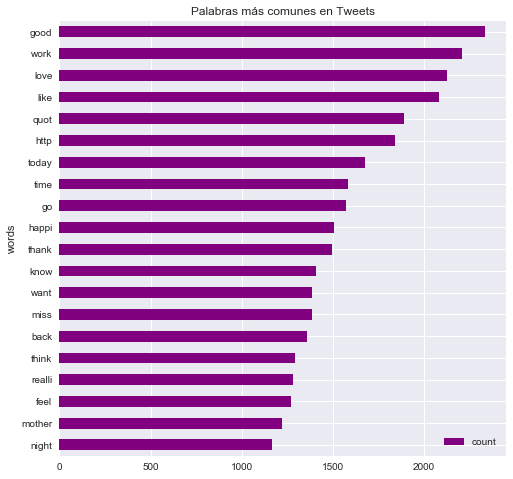

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Palabras más comunes en Tweets")

plt.show()

La palabra más común en tweets según el gráfico de arriba es good, seguida por work y love.

In [34]:
#all_words = ' '.join([text for text in clean_tweets['words']])
#from wordcloud import WordCloud
#wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

#plt.figure(figsize=(10, 7))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis('off')
#plt.show()

**3. Preparación del vector objetivo y las matrices de entrenamiento y validación:**
Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello deberá
generar la recodificación de cada una de las clases en una de las dos emociones.
- Si el tweet está asignado como neutral , clasifíquelo aleatoriamente entre positivo o
negativo.


utilizaremos una funcion simple para generar aleatoriamente si retorna la palabra positivo o negativo


In [36]:
#reemplazamos los sentiemientos de la vatriable objetivo segun los indicado, sentimientos positivos, negativos y los neutrales aleatoriamente distribuidos entre los ya nombrados
df['sentiment'] = df['sentiment'].replace(
['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger','happiness', 'love', 'surprise', 'fun','relief', 'enthusiasm', 'neutral'],
['negative','negative','negative','negative','negative','negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', func.generate_sent()])

In [37]:
df.head(15)

,sentiment,author,content,count,content_recod,content_recod2
0,negative,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,know listenin habit earlier started freakin part,"[know, listenin, habit, earlier, start, freaki..."
1,negative,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin headache ughhhh waitin call,"[layin, headach, ughhhh, waitin, call]"
2,negative,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday,"[funer, ceremoni, gloomi, friday]"
3,positive,czareaquino,wants to hang out with friends SOON!,1,wants hang friends soon,"[want, hang, friend, soon]"
4,negative,xkilljoyx,@dannycastillo We want to trade with someone w...,1,want trade someone houston tickets,"[want, trade, someon, houston, ticket]"
5,negative,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...,1,pinging prom like friends,"[ping, prom, like, friend]"
6,negative,ShansBee,"I should be sleep, but im not! thinking about ...",1,sleep thinking friend want married damn wants ...,"[sleep, think, friend, want, marri, damn, want..."
7,negative,mcsleazy,Hmmm. http://www.djhero.com/ is down,1,hmmm http djhero,"[hmmm, http, djhero]"
8,negative,nic0lepaula,@charviray Charlene my love. I miss you,1,charlene love miss,"[charlen, love, miss]"
9,negative,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,1,sorry least friday,"[sorri, least, friday]"


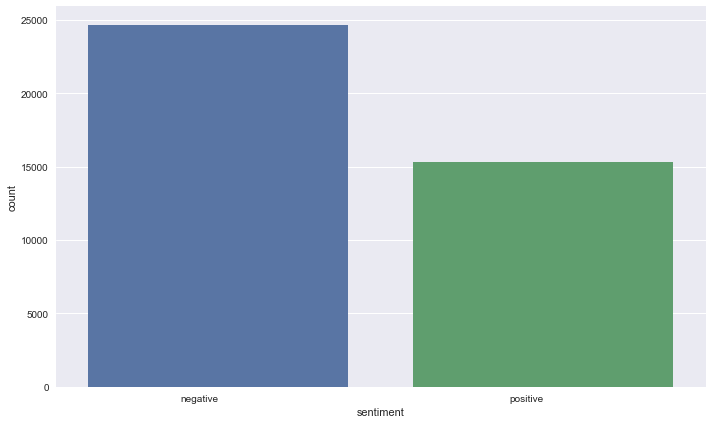

In [38]:
ax1 = sns.countplot(x='sentiment',data=df,order=df['sentiment'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0,ha='right')
plt.tight_layout()
plt.show()

In [39]:
#Agrupamos los valores de acuerdo a los sentimientos por autor
agrupacion2 = df.groupby(by=[ 'author','sentiment'], as_index=False).count()

#Pivotear los datos
f= agrupacion2.pivot( 'author','sentiment','count')

#Reemplaza los NA por 0 y deja los números en enteros
f= f.fillna(0).astype(int)

f.sort_values(by='positive',ascending=False).head(5)

sentiment,negative,positive
author,,
tsarnick,5,12
ChineseLearn,10,12
MissxMarisa,12,11
twebbstack,4,10
erkagarcia,10,9


Según la tabla, el autor con los comentarios expresando la mayor cantidad de sentimientos positivos es tsarnick

In [40]:
f.sort_values(by='negative',ascending=False).head(5)

sentiment,negative,positive
author,,
lost_dog,17,1
MiDesfileNegro,14,5
Dogbook,12,2
MissxMarisa,12,11
beingnobody,11,0


Por otro lado, el autor con los comentarios expresando la mayor cantidad de sentimientos negativos es lost_dog

In [41]:
df['sentiment_recod'] = np.where(df['sentiment']=='negative',-1,1)

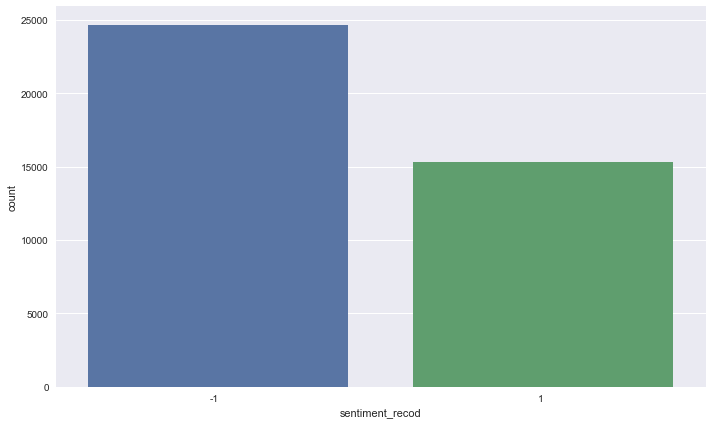

In [42]:
ax1 = sns.countplot(x='sentiment_recod',data=df,order=df['sentiment_recod'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0,ha='right')
plt.tight_layout()
plt.show()

nuestro vector objetivo esta algo desbalanceado presentando 62% para sentiemientos negativos(-1) y 38% para sentimientos positivos(1), a pesar del desbalance de clases trabajaremos el vector como quedo luego de la distribucion aleatoria de los sentimientos neutrales.

In [43]:
df['sentiment_recod'].value_counts('%')

-1    0.617525
 1    0.382475
Name: sentiment_recod, dtype: float64

In [44]:
df.head()

,sentiment,author,content,count,content_recod,content_recod2,sentiment_recod
0,negative,xoshayzers,@tiffanylue i know i was listenin to bad habi...,1,know listenin habit earlier started freakin part,"[know, listenin, habit, earlier, start, freaki...",-1
1,negative,wannamama,Layin n bed with a headache ughhhh...waitin o...,1,layin headache ughhhh waitin call,"[layin, headach, ughhhh, waitin, call]",-1
2,negative,coolfunky,Funeral ceremony...gloomy friday...,1,funeral ceremony gloomy friday,"[funer, ceremoni, gloomi, friday]",-1
3,positive,czareaquino,wants to hang out with friends SOON!,1,wants hang friends soon,"[want, hang, friend, soon]",1
4,negative,xkilljoyx,@dannycastillo We want to trade with someone w...,1,want trade someone houston tickets,"[want, trade, someon, houston, ticket]",-1


**4. Entrenamiento de modelos:**
- En base a los modelos vistos en clase, implemente por lo menos 5. Para cada uno de
ellos justifique la elección de hiperparámetros. Si implementa búsqueda de grilla para
cada uno de ellos, defina el rango de valores a tomar en cada hiperparámetro.
- Reporte el desempeño de cada modelo en las muestras de entrenamiento y validación.
Comente sobre la capacidad de generalización de cada uno de ellos haciendo uso de los
conceptos vistos en el curso.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer(stop_words='english',max_features=1000)

cv_fit = cv.fit_transform(df['content_recod'])

cv_fit

words = cv.get_feature_names()



word_freq = cv_fit.toarray()

type(df['content_recod'])

df_cv = pd.DataFrame(word_freq,columns=words)

In [47]:
df_cv.head()

,able,absolutely,access,account,actually,afford,afraid,afternoon,ages,agree,...,xoxo,yall,yeah,year,years,yesterday,yfrog,young,youtube,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_cv,
                                                  df['sentiment_recod'],
                                                  test_size=.33,
                                                  random_state=3504)

Definimos un 30% de datos para el set de prueba y un 70% para el set de entrenamiento

**4.1- Naive Bayes**

In [49]:
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()

NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [50]:
from sklearn.metrics import classification_report

y_hat = NB.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.73      0.85      0.79      8192
           1       0.67      0.49      0.57      5008

    accuracy                           0.71     13200
   macro avg       0.70      0.67      0.68     13200
weighted avg       0.71      0.71      0.70     13200



A pesar de ser un modelo simple, NB funciona bastante bien, teniendo un rendimiento superior en la clase -1, generando en su conjunto un f-1 de 68% el mas alto junto con voting classifier por lo que ambos seran serializados

A pesar de ser un modelo simple, NB funciona bastante bien, teniendo un rendimiento superior en la clase -1, generando en su conjunto un f-1 de 68%

**4.2- Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=3540, penalty='l2')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=3540, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_hat = lr.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.73      0.86      0.79      8192
           1       0.67      0.47      0.55      5008

    accuracy                           0.71     13200
   macro avg       0.70      0.67      0.67     13200
weighted avg       0.71      0.71      0.70     13200



In [53]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=3504, fit_intercept=False)
logreg_cv=GridSearchCV(logreg,grid,cv=5, scoring='f1', n_jobs=-1)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=False,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=3504, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

Utilizamos GridSearch para optimizar los hiperparámetros

In [54]:
logreg_cv.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [55]:
y_hat = logreg_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.73      0.81      0.77      8192
           1       0.63      0.52      0.57      5008

    accuracy                           0.70     13200
   macro avg       0.68      0.67      0.67     13200
weighted avg       0.69      0.70      0.69     13200



al utilizar la regresion logistica observamos que se repite el patron, la clase -1 tiene un valor de mejor desempeño que 1, por otro lado en su conjunto la metrica f-1 nos arroja un 67%

**4.3- Classification Tree**

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [57]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
y_hat = dtc.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.71      0.76      0.73      8192
           1       0.55      0.48      0.51      5008

    accuracy                           0.65     13200
   macro avg       0.63      0.62      0.62     13200
weighted avg       0.65      0.65      0.65     13200



para el arbol de clasificacion obetenemos que la tendencia de obtener mejores resultados en la clase -1 continua, en este caso enontramos un valo de f-1 promedio de 62%

In [59]:
import pickle

In [60]:
try:
    dec_tree_grid_cv = pickle.load(open('dec_tree_grid_cv.sav','rb'))
except:

    dec_tree_grid_cv = GridSearchCV(DecisionTreeClassifier(),
                                        # evaluamos 10 escenarios
                                       {'min_samples_split': np.linspace(0.1, 1.0, 10),
                                        # implementando 2 criterios de partición
                                        'criterion': ['gini', 'entropy'],
                                        # con una profundidad de ramas hasta 5
                                       'max_depth': np.linspace(1, 5, 5),
                                        # evaluando 10 escenarios
                                       'min_samples_leaf': np.linspace(0.1, 0.5, 10)},
                                    # Con 3 validaciones cruzadas
                                    cv=3,
                                    # Ocupando todos los núcleos del computador
                                    n_jobs=-1, scoring='f1').fit(X_train, y_train)

    pickle.dump(dec_tree_grid_cv, open('dec_tree_grid_cv.sav','wb'))

In [61]:
dec_tree_grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1.0,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1}

In [62]:
y_hat = dec_tree_grid_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

          -1       0.62      1.00      0.77      8192
           1       0.00      0.00      0.00      5008

    accuracy                           0.62     13200
   macro avg       0.31      0.50      0.38     13200
weighted avg       0.39      0.62      0.48     13200



al intentar hacer una busqueda de mejores hiperparametros nos encontramos con que la clase -1 tiene una mejora en su f-1, pero nos arroja un valor de 0 para la clase 1, por lo que nuestro f-1 se ve bastante afectado con un f-1 de 38%

**4.4- Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
voting_rf = RandomForestClassifier(oob_score=True, random_state=11238).fit(X_train, y_train)

In [65]:
print(classification_report(y_test, voting_rf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.72      0.77      0.75      8192
           1       0.58      0.51      0.54      5008

    accuracy                           0.67     13200
   macro avg       0.65      0.64      0.64     13200
weighted avg       0.67      0.67      0.67     13200



en random forest como en todos los modelos vistos la clase -1 de nuestro vector objetivo tiene mucho mejor f-1 que la clase 1, nuestro F-1 de ambas clases nos arroja un %64

**4.5- AdaBoost**

In [66]:
decision_stump = DecisionTreeClassifier(max_depth=5, random_state=11238).fit(X_train, y_train)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
#adaboost_classifier = AdaBoostClassifier(base_estimator=logreg_cv.best_estimator_, random_state=3504).fit(X_train, y_train)
adaboost_classifier = GridSearchCV(AdaBoostClassifier(base_estimator=decision_stump, random_state=3504),{'learning_rate':[0.01,0.1,0.5],'n_estimators':[50,100]},cv=2, n_jobs=-1).fit(X_train, y_train)

In [68]:
adaboost_classifier.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [69]:
adaboost_y_hat=adaboost_classifier.predict(X_test)

In [70]:
print(classification_report(y_test, adaboost_y_hat))

              precision    recall  f1-score   support

          -1       0.72      0.86      0.79      8192
           1       0.67      0.45      0.54      5008

    accuracy                           0.71     13200
   macro avg       0.70      0.66      0.66     13200
weighted avg       0.70      0.71      0.69     13200



pese a hacer una busqueda de grilla el modelo  no presenta un buen rendimiento, en la clase -1 es otra vez mejor pero en la clase 1 preseta un rendimeinto mas bajo, se repite el patron general de todos los modelos vistos anteriormente, el promedio del f-1 de ambas clases es de %66

**4.6- Voting Clasifier**

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# definimos el comité de clasificadores en una lista de tuplas

rep_seed = 3504


estimators3 = [('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
              ('Logistic Regression', LogisticRegression(random_state= rep_seed,fit_intercept=False)),
              
              ('Naive Bayes', BernoulliNB())
             ]


Generamos un loop que nos permite buscar cual es el mejor f-1 macro de una combinación de pesos, de forma de elegir el mejor

In [72]:
from sklearn.ensemble import VotingClassifier
df_n = pd.DataFrame(columns=('w1', 'w2', 'w3', 'f1'))

i = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):

            if len(set((w1,w2,w3))) == 1: 
                continue
            voting_classifier = VotingClassifier(estimators3,voting='soft',weights=(w1,w2,w3)).fit(X_train, y_train)
            #print((w1,w2,w3))
            #print(classification_report(y_test, voting_classifier.predict(X_test)))
            
            df_l = pd.DataFrame(classification_report(y_test, voting_classifier.predict(X_test), output_dict=True))
            df_l.ix[0,3]
            df_n.loc[i] = [w1, w2, w3, df_l.ix[0,3]]
            i += 1
df_n.sort_values(by='f1', ascending=False)


,w1,w2,w3,f1
0,1.0,1.0,2.0,0.679118
4,1.0,2.0,3.0,0.679029
7,1.0,3.0,3.0,0.678387
12,2.0,2.0,3.0,0.678216
6,1.0,3.0,2.0,0.678194
3,1.0,2.0,2.0,0.678077
2,1.0,2.0,1.0,0.677955
15,2.0,3.0,3.0,0.677876
1,1.0,1.0,3.0,0.677844
10,2.0,1.0,3.0,0.677238


In [73]:
voting_classifier = VotingClassifier(estimators3,voting='soft',weights=[1,2,2]).fit(X_train, y_train)

In [74]:
print(classification_report(y_test, voting_classifier.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.73      0.85      0.79      8192
           1       0.67      0.50      0.57      5008

    accuracy                           0.71     13200
   macro avg       0.70      0.67      0.68     13200
weighted avg       0.71      0.71      0.70     13200



El Voting classifier nos da una de las mejores puntuaciones de f-1, el mismo que NB, promediamos un F-1 de 68% por lo que este modelo sera seleccionado para ser serializado


**5. Seleccione los 2 mejores modelos, serialicelos y envíelos a evaluación. Recuerde que el
modelo serializado debe ser posterior al fit , para poder ejecutar predict en los nuevos
datos.**



Los dos mejores modelos son naive bayes, y voting classifier. Serializamos ambos

In [75]:
pickle.dump(X_train, open('TTH-X_train.sav', 'wb'))
pickle.dump(X_test, open('TTH-X_test.sav', 'wb'))
pickle.dump(y_train, open('TTH-y_train.sav', 'wb'))
pickle.dump(y_test, open('TTH-y_test.sav', 'wb'))
NV_modelo_1 = pickle.dump(NB, open('modelo-1.sav','wb')) # Naive Bayes
VC_modelo_2 = pickle.dump(voting_classifier, open('modelo-2.sav','wb')) # Voting classifier


**6. La evaluación del modelo será realizada en función a un conjunto de datos reservados al cual no tienen acceso.**